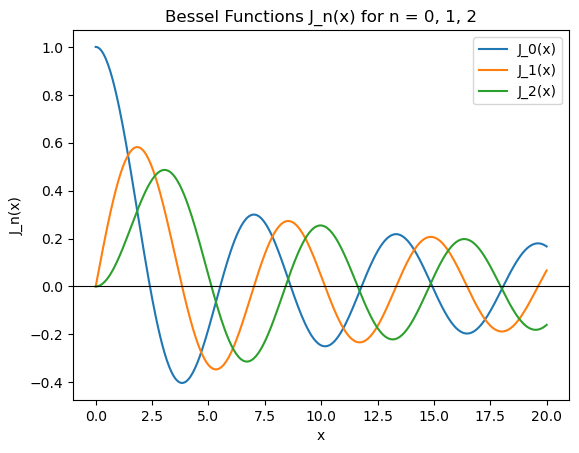

First 5 positive roots of J_0(x):
  Root #1: x = 2.402720
  Root #2: x = 8.652363
  Root #3: x = 14.930576
  Root #4: x = 21.208788
  Root #5: x = 27.487001

Failed to find root in bracket (3.8312101728818404, 3.8383526218031148)
Failed to find root in bracket (10.166562366052293, 10.173704814973568)
Failed to find root in bracket (16.466202314616375, 16.47334476353765)
Failed to find root in bracket (22.758699814259185, 22.765842263180456)
Failed to find root in bracket (29.044054864980716, 29.05119731390199)
Failed to find root in bracket (35.32940991570224, 35.336552364623515)
Failed to find root in bracket (41.61476496642378, 41.62190741534505)
Failed to find root in bracket (47.900120017145305, 47.907262466066584)
First 5 positive roots of J_1(x):

Failed to find root in bracket (5.1311358765537936, 5.138278325475068)
Failed to find root in bracket (11.61647949707101, 11.623621945992285)
Failed to find root in bracket (17.95897413916274, 17.966116588084013)
Failed to find root in 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn  # jn(n, x) gives J_n(x)
from scipy.optimize import brentq

def find_bessel_roots(n, num_roots=5, x_max=20):
    """
    Find the first `num_roots` positive roots of J_n(x) up to x = x_max.
    Uses a simple bracket-search approach + brentq to refine each root.
    """

    roots = []
    # We'll search in small intervals up to x_max.
    # Step size can be chosen smaller or bigger depending on accuracy needed.
    x_vals = np.linspace(0.01, x_max, 7000) 
    f_vals = jn(n, x_vals)
    
    # Loop through x_vals in pairs to find sign changes
    for i in range(len(x_vals) - 1):
        if f_vals[i] == 0.0:
            # Rarely hits exactly zero if the function is tabulated finely
            root_guess = x_vals[i]
            roots.append(root_guess)
        elif np.sign(f_vals[i]) != np.sign(f_vals[i+1]) < 0:
            # There's a sign change between x_vals[i] and x_vals[i+1]
            # Use brentq on that bracket
            try:
                bracket_root = brentq(jn, x_vals[i], x_vals[i+1], args=(n,))
                roots.append(bracket_root)
            except ValueError:
                print(f"Failed to find root in bracket ({x_vals[i]}, {x_vals[i+1]})")   
        
        # If we have found enough roots, stop
        if len(roots) >= num_roots:
            break
    
    # If we didn't find enough, you may need to increase x_max or the resolution.
    return roots

def main():
    # 1. Plot J_0, J_1, and J_2 from x=0 to x=20
    x = np.linspace(0, 20, 400)
    
    plt.figure()  # Create a new figure
    for n in [0, 1, 2]:
        y = jn(n, x)
        plt.plot(x, y, label=f'J_{n}(x)')
    
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title('Bessel Functions J_n(x) for n = 0, 1, 2')
    plt.xlabel('x')
    plt.ylabel('J_n(x)')
    plt.legend()
    plt.show()
    
    # 2. Find the first five roots of each J_n
    for n in [0, 1, 2]:
        roots_n = find_bessel_roots(n, num_roots=5, x_max=50)
        print(f"First 5 positive roots of J_{n}(x):")
        for i, r in enumerate(roots_n, start=1):
            print(f"  Root #{i}: x = {r:.6f}")
        print()  # blank line for readability

if __name__ == '__main__':
    main()


# Took about 5 mins to run lol